In [1]:
import numpy as np
import pandas as pd
fifa_agg = pd.read_csv(r"../input/cluster-dataset/fifa_18_sample_data.csv")
fifa_agg.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


## 1. Basics of hierarchical clustering
### 1.1. Theory.
#### Creating a distance matrix using linkage
A critical step is to compute the distance matrix at each stage. This is achieved through the linkage method available in scipy-dot-cluster-dot-hierarchy. This process computes the distances between clusters as we go from N clusters to 1 cluster, where N is the number of points. There are four parameters for this method. 
- The first parameter is the `observations`. 
- The second parameter, method, tells the `algorithm` how to calculate proximity between two clusters. 
- The `metric` is the function that decides the `distance` between two objects. Euclidean distance is a straight line distance between two points on a 2D plane. You can use your own function here. 
- The `optimal_ordering` is an `optional argument` that changes the **order of linkage matrix**. We will not use this argument. 

Let us explore the method argument.

In [2]:
from scipy.cluster.hierarchy import linkage, fcluster

distance_matrix = linkage(fifa_agg[['eur_wage', 'eur_value']],
                                   method = 'single', 
                                   metric = 'euclidean', 
                                   optimal_ordering = False)
distance_matrix

array([[2.50000000e+01, 2.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 8.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.08000000e+02, 2.16000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.99300000e+03, 1.99500000e+03, 7.50000667e+06, 9.98000000e+02],
       [1.00000000e+00, 1.99600000e+03, 8.00018906e+06, 9.99000000e+02],
       [2.00000000e+00, 1.99700000e+03, 1.80022561e+07, 1.00000000e+03]])

#### Which method should use?
The second parameter in the `linkage`, (`method`), decides how clusters are separated at each step. This is the parameter that we will tweak in this lesson and see the differences. 
- The **single method** decides the proximity of clusters based on their two closest objects. 
- On the other extreme end, the **complete method** decides the **proximity of** `cluster centers` based on their two farthest objects. 
- The **average and centroid methods** decide cluster proximities based on `arithmetic and geometric means`, **respectively**. 
- The **median method** uses the `median of cluster objects`.
- Finally, the **ward method** that we used earlier computes cluster proximity using the difference between summed squares of their joint clusters minus the individual **summed squares**. The ward method focuses on clusters more concentric towards its center.

#### Create cluster labels with fcluster
Once you have created the `distance matrix`, you can create the `cluster labels` through the `fcluster method`, which takes three arguments 
- the distance matrix, 
- the number of clusters and 
- the `criteria` to form the clusters based on certain thresholds.

We will use the value of maxclust in the criterion argument.

In [3]:
cluster_labels = fcluster(distance_matrix, 2, criterion = 'maxclust')

#### Hierarchical clustering with ward method
Let us try to understand the differences between various methods to perform hierarchical clustering on a list of points on a 2D plane. This is the result using the ward method. Notice that clusters are generally dense towards the centers. In all `seaborn` plots, an extra cluster with label 0 is shown, even though no objects are present in it. This can be removed if you store the cluster labels as strings.

Next, we will use the single method to see how the clusters change. Recall the single method used the two closest objects between clusters to determine the inter-cluster proximity. Naturally, the clusters formed when performing clustering through this method are more dispersed. Although the top cluster, labelled 1, is roughly the same, most objects from cluster 3 have shifted to cluster 2.

In the next and final iteration, we look at the clusters formed by the complete method. This method uses the two farthest objects among clusters to determine inter-cluster proximity. Coincidentally, though, the results of the complete method on the same data points that we used is similar to that of the ward method.

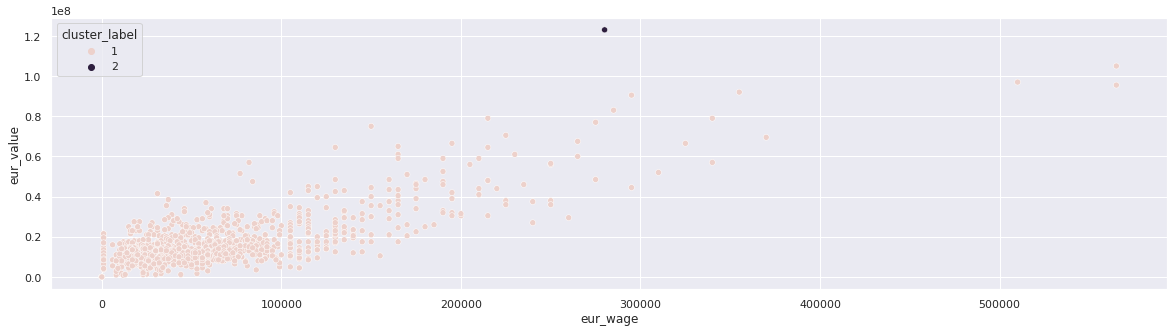

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df = fifa_agg.copy()
df['cluster_label'] = cluster_labels

fig, ax = plt.subplots(figsize = (20, 5))
sns.scatterplot(x = 'eur_wage',
                y = 'eur_value',
               hue = 'cluster_label',
               data = df,
               ax = ax)
plt.show()

#### Final thoughts on selecting a method
Here are a few thoughts before we complete this lesson.
- First, there is no right method that you can apply to all problems that you face. 
- You would need to carefully study the data that you are going to handle to decide which method is right for your case, which falls outside the scope of this course.

### 1.2. PRACTICE
#### Exercise 1.2.1. Hierarchical clustering: ward method
It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

In [5]:
from scipy.cluster.vq import whiten

x_coordinate = np.array([17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87,
                           83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27,
                           17, 17])
y_coordinate = np.array([  4,   6,   0,   0,   4,   3,   1,   6,   5,   4,   6,  10,   8,
                            10,  97,  94,  99,  95,  95,  97,  99,  99,  94,  99,  90,  98,
                           100,  93,  98,  15,  10,   0,  10,   7,  17,  15])
comic_con = pd.DataFrame({'x_coordinate': x_coordinate,
                          'y_coordinate': y_coordinate,
                          'x_scaled' : whiten(x_coordinate), 
                          'y_scaled' : whiten(y_coordinate)
                         })
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


The data is stored in a Pandas data frame, `comic_con`. 

`x_scaled` and `y_scaled` are the column names of the standardized `X` and `Y` coordinates of people at a given point in time.
#### SOLTION

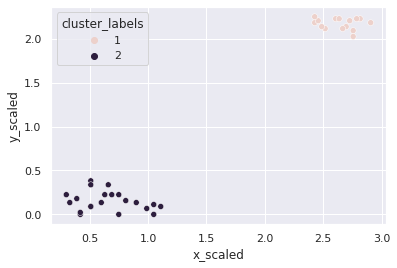

In [6]:
# Use the linkage() function with ward method
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], 
                            method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion = 'maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

#### Exercise 1.2.2. Hierarchical clustering: single method
Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, `comic_con`. 

`x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time.
#### SOLUTION

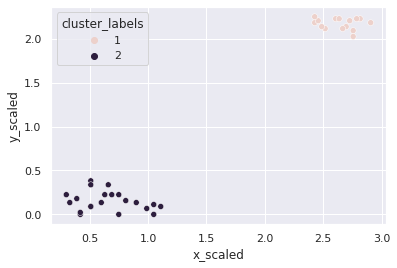

In [7]:
# Use the linkage() function with single method
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], 
                          method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion = 'maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

**Comments.** Notice that *in this example*, the `clusters` formed are **not different** from the ones created using the `ward method`.

#### Exercise 1.2.3. Hierarchical clustering: complete method
For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, `comic_con`. 

`x_scaled` and `y_scaled` are the column names of the standardized `X` and `Y coordinates` of people at a given point in time.
#### SOLUTION.

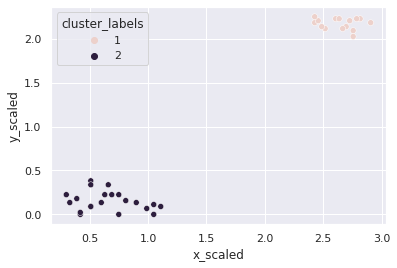

In [8]:
# Use the linkage() function with using the complete method 
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], 
                          method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

**Comments.** Coincidentally, the clusters formed are not different from the ward or single methods.

## 2. Visualize clusters
Now that you are familiar with hierarchical clustering and how the algorithm works, let us take a step in the direction of visualizing clusters.
### 2.1. Theory
#### Why visualize clusters?
Why do we need to visualize clusters? 
- One can **quickly make sense** of the clusters formed by any algorithm by visually analyzing it rather than just looking at cluster centers. 
- It can serve as an **additional step** for `validation of clusters formed`. 
- Additionally, you may also **spot trends** in your data by visually going through it. 

Let us now look at possible ways of visualizing the clusters that we have formed in our earlier exercise.

#### An introduction to seaborn
[Seaborn](https://seaborn.pydata.org/) is a data visualization library in Python that is based on matplotlib. 

It provides better default plotting themes, which can be easily and intuitively modified. It has functions for quick visualizations in the context of data analytics.

- In this course on clustering, we use `Pandas data frames` to store our data, often adding a separate column for cluster centers. 

- `Seaborn` provides an `hue argument` in its scatterplot method to allow us to use different colors for cluster labels to differentiate the clusters when visualizing them.

Let us compare the implementation of the two plotting techniques - matplotlib and seaborn.

#### Visualize clusters with matplotlib
To visualize clusters, we first import the pyplot class in matplotlib. Let us start with a Pandas data frame which has the columns - x, y and label for its x and y coordinates and cluster labels, `A` and `B`. 

We will use the c argument of the scatter method, to assign a color to each cluster. However, we first need to manually map each cluster to a color. Therefore, we define a dictionary named colors with the cluster labels as keys, and the color associated with the clusters as its values. We then pass a list of colors to c argument using a lambda function, which returns the corresponding value of each cluster label.

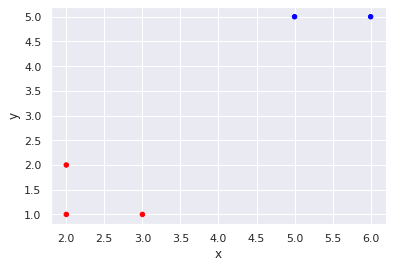

In [9]:
df = pd.DataFrame({'x': [2, 3, 5, 6, 2],
                   'y': [1, 1, 5, 5, 2],
                   'labels': ['A', 'A', 'B', 'B', 'A']
                  })
colors = {'A': 'red', 'B': 'blue'}
df.plot.scatter(x = 'x', y = 'y',
                c = df['labels'].apply(lambda x: colors[x]) 
               )
plt.show()

#### Visualize clusters with seaborn
The implementation in seaborn is fairly straightforward with the built in scatterplot method. 
- We first import the pyplot class and seaborn library. 
- We use the same data frame as earlier to visualize the clusters. 
- To visualize the data points with each point associated with a separate color, we use the `hue argument` of the scatterplot method, and pass on the column name of the cluster labels, which is labels in this example. 

Now that we have written the code for each of them, let us compare the results. Recall from the last lesson that seaborn shows an extra cluster with label 0 if the cluster labels are integers. In this example, we have manually assigned string cluster labels, so this issue will not arise.

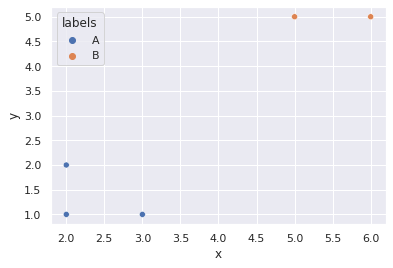

In [10]:
sns.scatterplot(x = 'x', y = 'y', hue = 'labels', data = df)
plt.show()

#### Comparison of both methods of visualization
Although the results are comparable, there are two reasons why we prefer seaborn. 
- First, the implementation using seaborn was more convenient once you have stored cluster labels in your data frame.
- Second, you do not need to manually select colors in seaborn as it would be using a default palette no matter how many clusters you have.

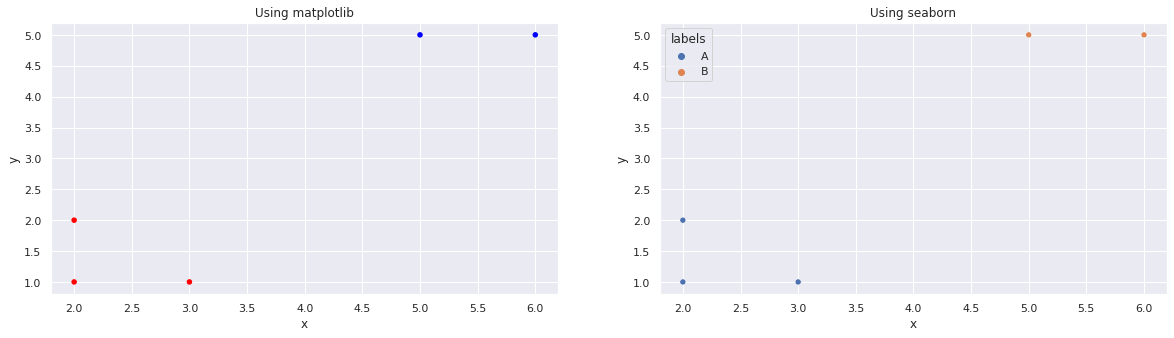

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
df.plot.scatter(x = 'x', y = 'y', ax = ax[0],
                c = df['labels'].apply(lambda x: colors[x]) 
               )
sns.scatterplot(x = 'x', y = 'y', hue = 'labels', data = df, ax = ax[1])

# set title
ax[0].set_title('Using matplotlib')
ax[1].set_title('Using seaborn')
# display
plt.show()

### 2.2. PRACTICE
#### Exercise 2.2.1. Visualize clusters with matplotlib
We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

The data is stored in a Pandas data frame, `comic_con`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time. `cluster_labels` has the cluster labels. A `linkage object` is stored in the variable `distance_matrix`.
#### SOLUTION.

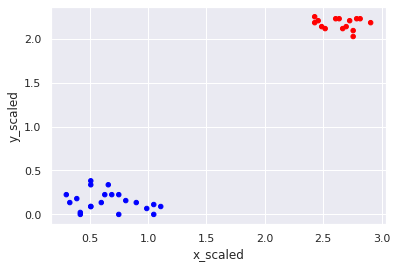

In [12]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled',y='y_scaled',
                       c=comic_con['cluster_labels'].apply(lambda x : colors[x]))
plt.show()

#### Exercise 2.2.2. Visualize clusters with seaborn
Let us now visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild hue function for cluster labels.

The data is stored in a Pandas data frame, `comic_con`.

`x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time. `cluster_labels` has the cluster labels. A `linkage object` is stored in the variable `distance_matrix`.
#### SOLUTION.

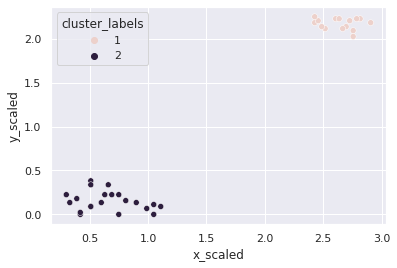

In [13]:
# Plot a scatter plot using seaborn
sns.scatterplot(x = 'x_scaled', 
                y = 'y_scaled', 
                hue = 'cluster_labels', 
                data = comic_con)
plt.show()

**Comments.** Notice the legend is automatically shown when using the hue argument.

## 3. How many clusters?
In this section, we will explore a way to decide how many clusters are present in our data
### 3.1. Theory.
#### Introduction to dendrograms
Up until this point, we have graphically looked at the number of points in our data sets to decide how many clusters to form. 
- To decide on the number of clusters in `hierarchical clustering`, we can use a graphical diagram called the **dendrogram**. 
- A dendrogram is a branching diagram that shows the progression in a linkage object as we proceed through the hierarchical clustering algorithm. 

Let us look at an example.

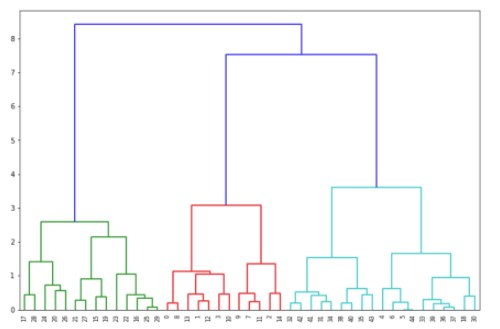

In [14]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

#### Create a dendrogram in SciPy
- The first step in creating a dendrogram is to import the method from `scipy.cluster.hierarchy`.
- Next, we use the linkage method to create a distance matrix.
- Finally, we use the dendrogram method and provide the linkage object as an argument, and display the plot.

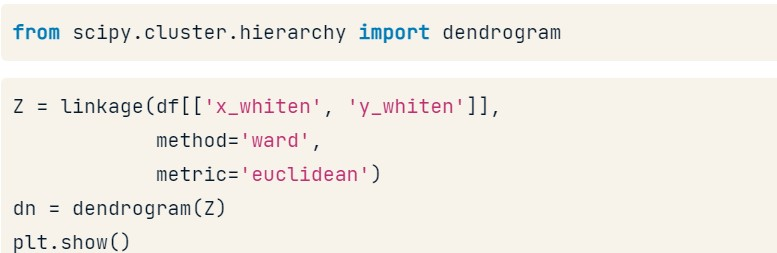

In [15]:
## Hình minh họa Image(fig1, height, width)

#### Dendrogram demonstration
To understand the intricacies of a dendrogram, let us look at the dendrogram that has been generated and then make corresponding clusters. Recall the hierarchical clustering algorithm, where each step was a result of merging of two closest clusters in the earlier step. The x axis represents individual points, whereas the y axis represents the distance or dissimilarity between clusters. In the dendrogram, each inverted U represents a cluster divided into its two child clusters. The inverted U at the top of the figure represents a single cluster of all the data points. The width of the U shape represents the distance between the two child clusters. A wider U, therefore, means that the two child clusters were farther away from each other as compared to a narrower U in the diagram.

Now, if you draw a horizontal line at any part of the figure, the number of vertical lines it intersects tells you the number of clusters at that stage, and the distance between those vertical lines indicates the inter-cluster distance. At the horizontal line drawn on the figure, we see that there are three clusters. When you move the line below, the number of clusters increases but the inter-cluster distance decreases. This information helps us in deciding the number of clusters. For instance, even though we haven't looked at the distribution of the data points, it seems that the top three clusters have the highest distances between them. At this point, I must reiterate that there is no right metric to decide how many clusters are ideal.

For instance, it looks like choosing three clusters should be ideal for this exercise. However, one's argument for two or four clusters may stand as well.

Let us look at the results of each of these three cases: 2 clusters, 3 clusters and 4 clusters.

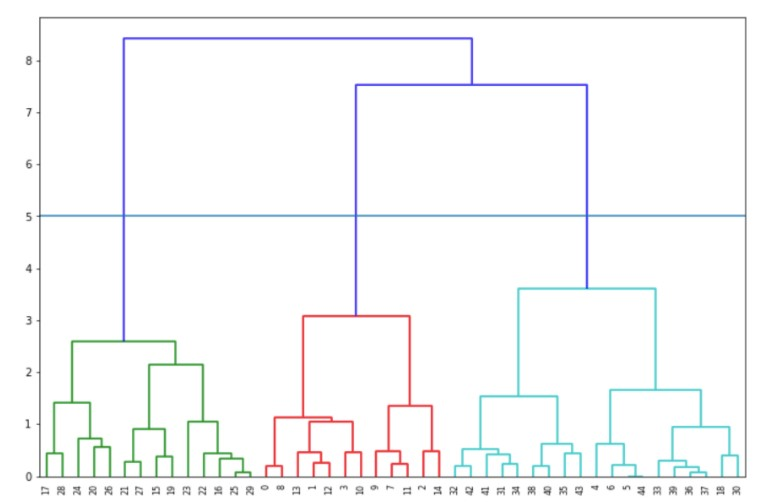

In [16]:
## Hình minh họa Image(fig1, height, width)

### 3.2. PRACTICES
#### Exercise 3.2.1. Create a dendrogram
Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.

The data is stored in a Pandas data frame, `comic_con`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A `linkage object` is stored in the variable `distance_matrix`.
#### SOLUTION.

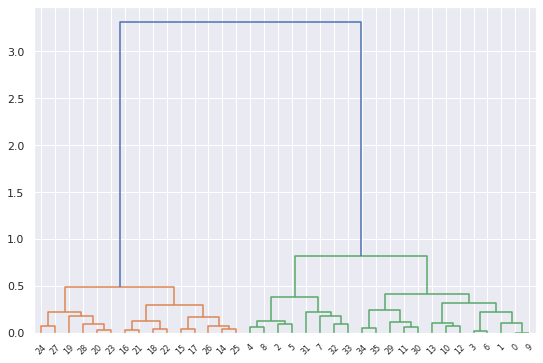

In [22]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize = (9, 6))

# Create a dendrogram
dn = dendrogram(distance_matrix, ax = ax)

# Display the dendogram
plt.show()

**Comments.** Notice the significant difference between the inter-cluster distances beyond the top two clusters.

#### Exercise 3.2.2. How many clusters in comic con data?
Given the dendrogram from the last exercise, how many clusters can you see in the data?
#### Answers.
Notice that the top two clusters are farthest away from each other; hence we have **2 clusters**.

## 4.  Limitations of hierarchical clustering
Now that you are familiar with hierarchical clustering let us look at the challenges when performing this type of clustering.
### 4.1. Theory
#### Measuring speed in hierarchical clustering
Let us design a small task to measure the speed of various iterations of hierarchical clustering in order to check how long it takes for iterations. 
- We will use the `timeit module` to check runtime of functions. 

>> As the most **time-consuming** step in the process of hierarchical clustering is constructing the distance matrix through the `linkage method`, we will time the amount of time it takes to form the matrix. 

- For the purpose of this exercise, we will use **randomly generated** data points on the XY plane. 

- To test the limits of the algorithm, we will use an increasing number of data points.

#### Use of timeit module
To demonstrate the use of timeit to further check how much time it may take for a large number of points, let us look at how long it takes to run the linkage method for 100 points with randomly generated coordinates. 
- We first import the random and timeit modules to generate the points and time the runtime of a function respectively. 

In [24]:
import timeit, random

- Next, we create a data frame with 100 points, and randomly generate 100 points within coordinates in the range of zero to a hundred. 

In [25]:
nb_points = 100
df = pd.DataFrame({'x': random.sample(range(0, nb_points), nb_points),
                   'y': random.sample(range(0, nb_points), nb_points)
                  })


1 ms ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


- To check the time of a function in the interpreter, we use the percent symbol before the timeit keyword followed by the statement that we were about to run. The timeit module runs the function multiple times and reports the mean and standard deviations of the runtimes. 

In [ ]:
%timeit linkage(df[['x', 'y']], method = 'ward', metric = 'euclidean')

Let us now perform iterations for an increasing number of points, check how long it takes to run the linkage method and then plot a graph to compare the performace.
#### Comparison of runtime of linkage method
If you plot the runtime of the linkage method with the number of points, you can see that the runtime increases with the increase in number of data points.

In addition to it, you would notice that the increase in run time is not linear with respect to the increase in data points, but quadratic. This makes the technique of hierarchical clustering infeasible for huge number of data points, for instance, the shopping habits of all customers in Walmart in a year.

### 4.2. PRACTICES
#### Exercise 4.2.1. Timing run of hierarchical clustering
In earlier exercises of this chapter, you have used the data of Comic-Con footfall to create clusters. **In this exercise you will time how long it takes to run the algorithm on [DataCamp's system](https://campus.datacamp.com/courses/cluster-analysis-in-python/hierarchical-clustering-d68aaee4-ef57-479b-b603-841a1b6f6719?ex=12)**.

Remember that you can time the execution of small code snippets with:

In [26]:
%timeit sum([1, 3, 2])

179 ns ± 1.52 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


The data is stored in a Pandas data frame, `comic_con`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time. The timeit module and linkage function are already imported

How long does it take to the run the linkage function on the comic con data?
#### Answers
- First, run this command

In [27]:
%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

791 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


- So, it took less than a millisecond (about 800 microseconds) to run the data.

#### Exercise 4.2.2. FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

- `sliding tackle`: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
- `aggression`: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.

In [34]:
fifa = pd.read_csv(r"../input/cluster-dataset/fifa_18_dataset.csv")
fifa[['scaled_sliding_tackle', 'scaled_aggression']] = whiten(fifa)
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,1.070924,3.609257
1,26,48,1.210610,2.749910
2,33,56,1.536544,3.208228
3,38,78,1.769353,4.468604
4,11,29,0.512181,1.661404


>- The following modules are pre-loaded: `dendrogram`, `linkage`, `fcluster` from `scipy.cluster.hierarchy`, `matplotlib.pyplot as plt`, s`eaborn as sns`. 
>- The data is stored in a Pandas dataframe, `fifa`.
#### SOLUTION

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


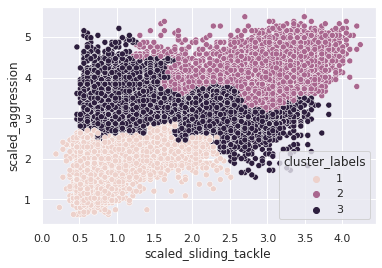

In [35]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data  (use 3 clusters).
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

**Comments.** Notice how long it took to run hierarchical clustering on a few thousand data points.